In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as teg

In [62]:
# i/o params
loc = "/scratch/hcm7920/ambData/channelMeanSpinup_0-100/"
loc2= "/scratch/hcm7920/ambData/grid/"
conc = [0,100]

# grid params
ny = 500
nz = 50

# plot params
deepIndex = 25
xRange = np.linspace(0,ny*2,ny)
xRMeters = xRange*1000

# phys params
g = 9.81
rhoConst = 1029

In [45]:
# load
rhoSteady = np.load(loc+"channelMeanRhoSpinup.npy")[:,:,0,:]
n2Steady  = np.load(loc+"channelMeanN2Spinup.npy")[:,:,0,:]
uSteady   = np.load(loc+"channelMeanUSpinup.npy")[:,:,0,:]
vSteady   = np.load(loc+"channelMeanVSpinup.npy")[:,:,0,:]
wSteady   = np.load(loc+"channelMeanWSpinup.npy")[:,:,0,:]

rhoTarget = np.load(loc+"channelMeanRhoSpinup.npy")[:,:,-1,:]
n2Target  = np.load(loc+"channelMeanN2Spinup.npy")[:,:,-1,:]
uTarget   = np.load(loc+"channelMeanUSpinup.npy")[:,:,-1,:]
vTarget   = np.load(loc+"channelMeanVSpinup.npy")[:,:,-1,:]
wTarget   = np.load(loc+"channelMeanWSpinup.npy")[:,:,-1,:]

levs = np.load(loc2+"gridLevs.npy")
levFaces = np.load(loc2+"gridLevFaces.npy")

n2Steady *= -g/rhoConst
n2Target *= -g/rhoConst

In [46]:
rhoSteady.min()

-25.128177642822266

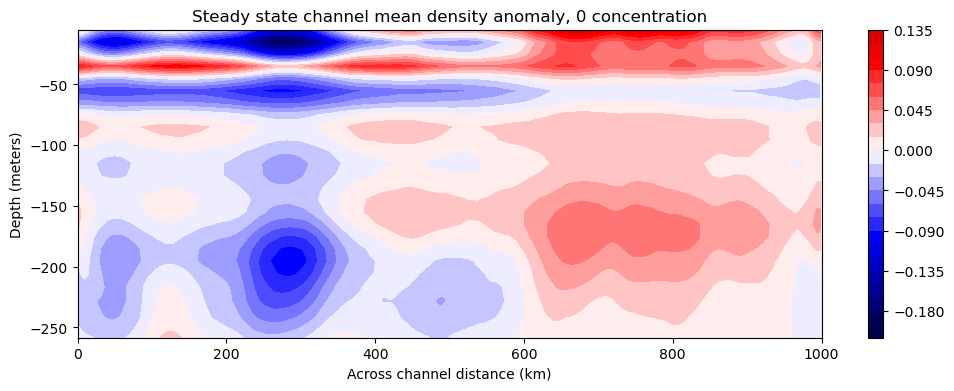

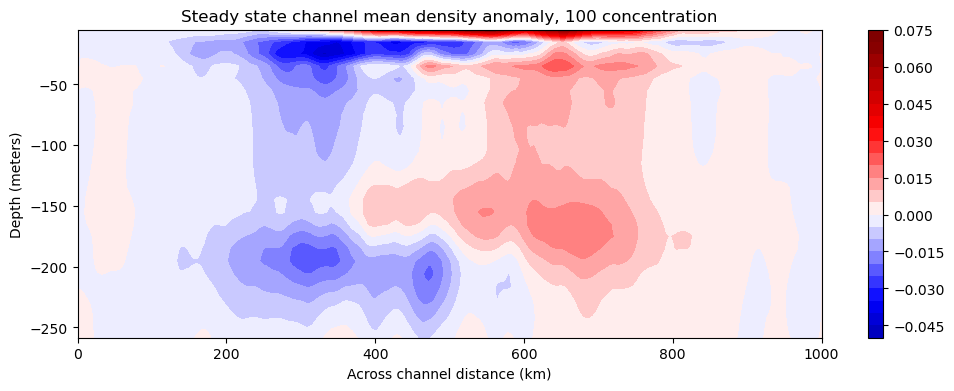

In [47]:
for i in range(len(conc)):
    plt.figure(figsize=(12,4))
    data=-rhoSteady[:deepIndex,:,i]+rhoTarget[:deepIndex,:,i]
    myMax=np.max(np.abs(data))
    plt.contourf(xRange,levs[:deepIndex],data,
                26,vmax=myMax,vmin=-myMax,cmap="seismic")
    plt.colorbar()
    plt.title(f"Steady state channel mean density anomaly, {conc[i]} concentration")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")

In [48]:
data.shape

(25, 500)

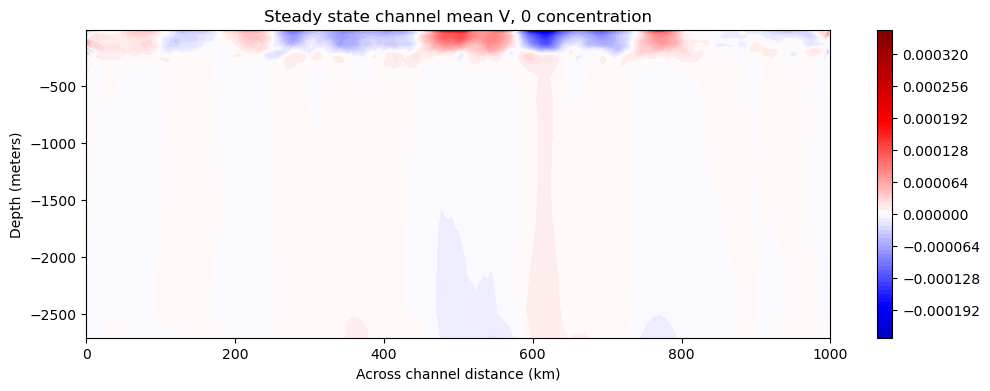

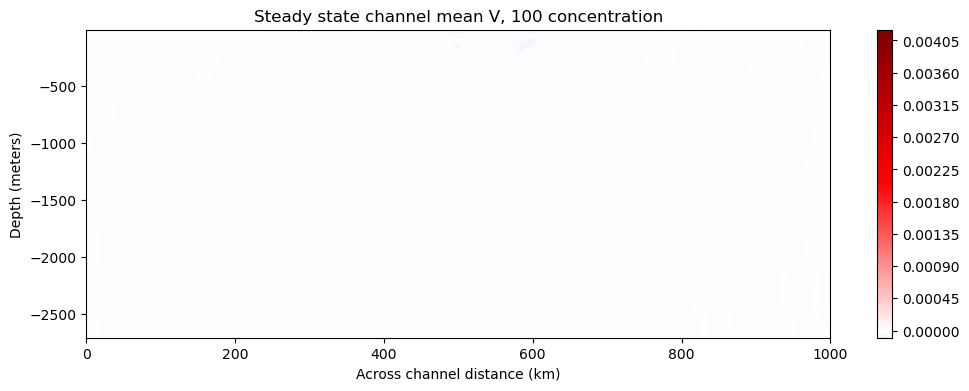

In [55]:
for i in range(len(conc)):
    plt.figure(figsize=(12,4))
    data=vSteady[:deepIndex,:,i]
    myMax=np.abs(np.max(data))
    plt.contourf(xRange[:],levs[:deepIndex],data,
                100,cmap='seismic',vmax=myMax,vmin=-myMax)
    plt.colorbar()
    plt.title(f"Steady state channel mean V, {conc[i]} concentration")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")

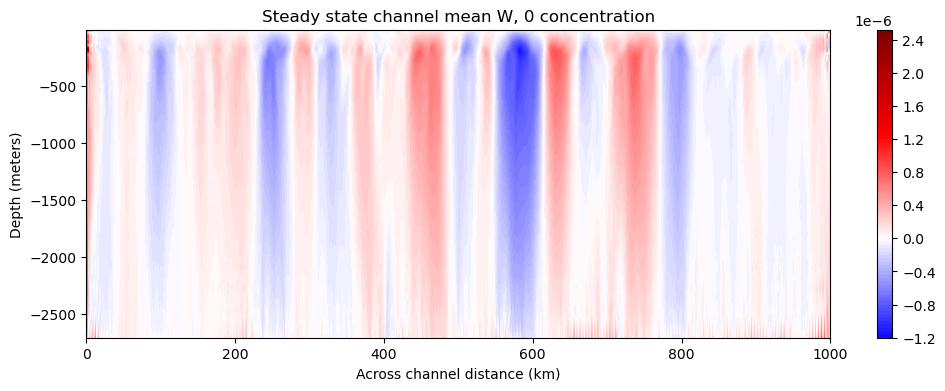

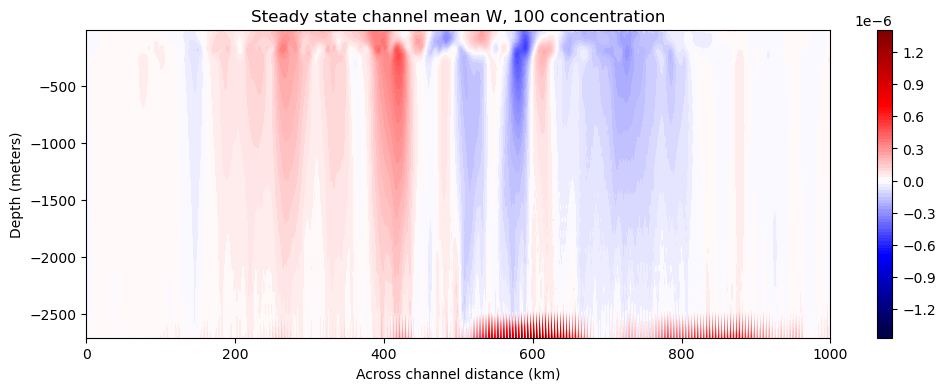

In [56]:
for i in range(len(conc)):
    plt.figure(figsize=(12,4))
    data=wSteady[:deepIndex,:,i]
    myMax=np.abs(np.max(data))
    plt.contourf(xRange,levs[:deepIndex],data,
                100,cmap='seismic',vmax=myMax,vmin=-myMax)
    plt.colorbar()
    plt.title(f"Steady state channel mean W, {conc[i]} concentration")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")

In [57]:
streamF1 = teg.cumulative_trapezoid(wSteady[:,:,:], x=xRMeters[:], axis=1, initial=0)
meanF1 = streamF1.mean(axis=(0,1))
maxLev1 = (streamF1-meanF1).max(axis=(0,1,2))
contourLevels1 = np.linspace(-maxLev1,maxLev1,20)

streamF2 = teg.cumulative_trapezoid(-vSteady[::-1,:,:], x=levs[::-1], axis=0, initial=0)
meanF2 = streamF2.mean(axis=(0,1))
maxLev2 = (streamF2-meanF2).max(axis=(0,1,2))
contourLevels2 = np.linspace(-maxLev2,maxLev2,20)

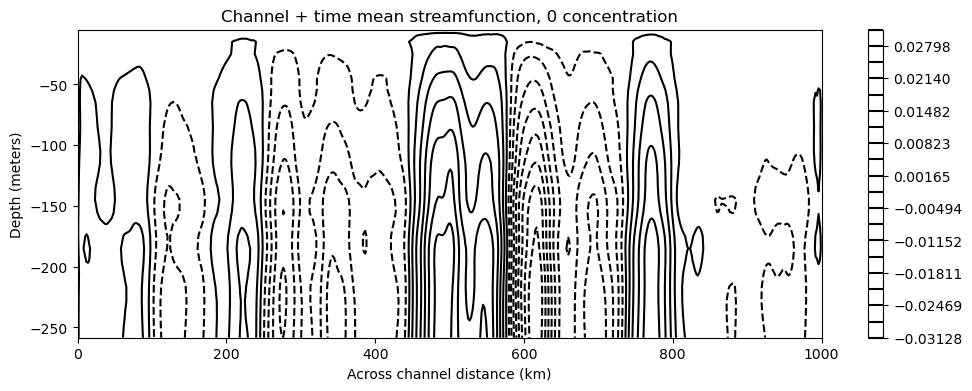

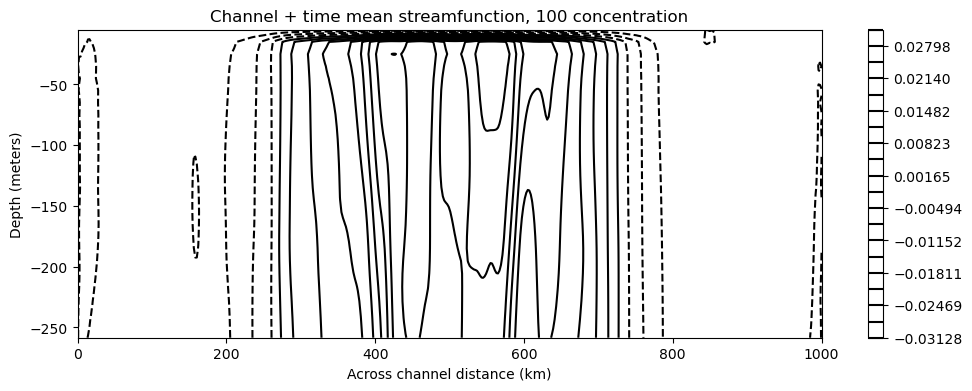

In [63]:


for i in range(len(conc)):
#     plt.figure(figsize=(12,4))
#     myMax=np.abs(np.max(data))
# #     plt.contour(xRange,levs[:deepIndex],streamF1[:,:deepIndex,i].T,26,colors="black")
#     plt.contour(xRange,levs[:deepIndex],streamF2[:deepIndex,:,i],26
#                ,colors="black")
#     plt.colorbar()
#     plt.title(f"Channel time mean streamfunction, u from bottom, {conc[i]} concentration")
#     plt.xlabel("Across channel distance (km)")
#     plt.ylabel("Depth (meters)")
    
    plt.figure(figsize=(12,4))
    myMax=np.max(np.abs(data))
    plt.contour(xRange,levs[:deepIndex],streamF1[:deepIndex,:,i]-meanF1[i],
                contourLevels1,colors="black")
#     plt.contour(xRange,levs[:deepIndex],streamF2[:,:deepIndex,i].T,26,colors="blue")
    plt.colorbar()
    plt.title(f"Channel + time mean streamfunction, {conc[i]} concentration")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")
    plt.savefig(f"/home/hcm7920/experiments/arcticMiddepthBI/plots/psiSectionChannelTimeMean{conc[i]}.png"
               ,bbox_inches="tight",pad_inches=0)

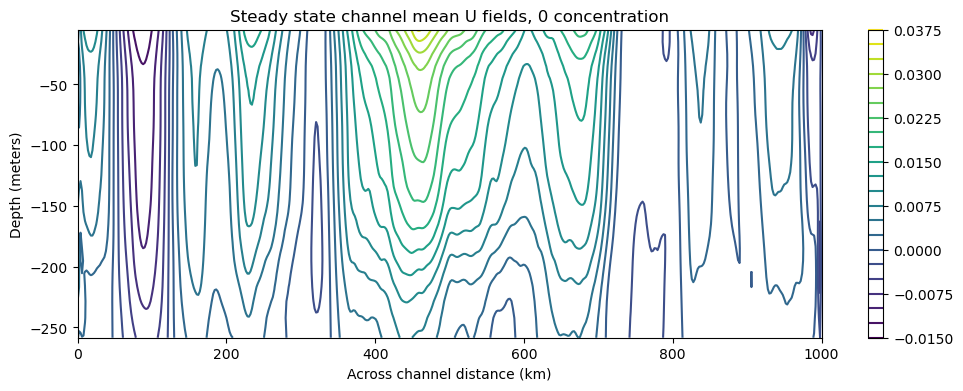

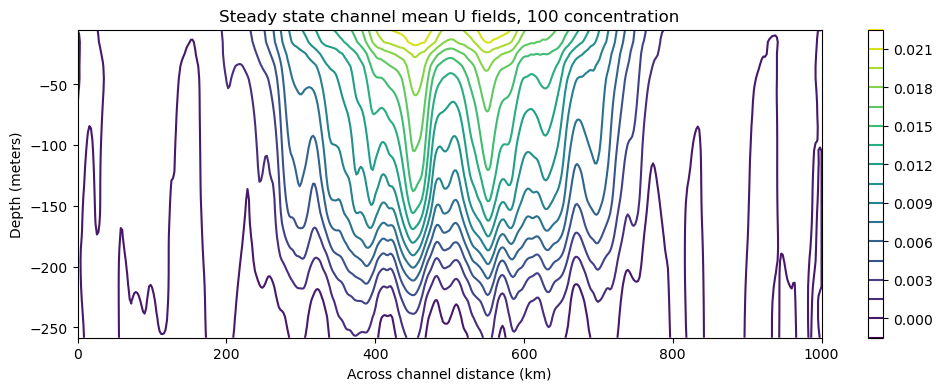

In [64]:
for i in range(len(conc)):
    plt.figure(figsize=(12,4))
    data=uSteady[:deepIndex,:,i]
    myMax=np.abs(np.max(data))
    plt.contour(xRange,levs[:deepIndex],data,
                20,cmap='viridis')#,vmax=myMax,vmin=-myMax)
    plt.colorbar()
    plt.title(f"Steady state channel mean U fields, {conc[i]} concentration")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")